In [63]:
import pickle as pkl
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
plt.style.use(['science','no-latex'])

In [75]:
def readRes(data_name, diff, model_name, metric, prefix="3regular"):
    data_path = "../data/{}/{}/train_data/{}_100.pkl_{}_testResults.pkl".format(prefix, data_name, diff, model_name)
    with open(data_path, "rb") as f:
        data = pkl.load(f)
    
    dmp = data["dmp_predict"]
    model = data["test_predict"]
    label = data["test_label"]
    
    DMP = []
    MODEL = []
    
    for d, m, l in zip(dmp, model, label):
        if metric == "all":
            d = d.flatten()
            m = m.flatten()
            l = l.flatten()
            
            dl1 = np.mean(np.abs(d-l))
            ml1 = np.mean(np.abs(m-l))
            
            DMP.append(dl1)
            MODEL.append(ml1)
            
        elif metric == "final":
            d = d[-1].flatten()
            m = m[-1].flatten()
            l = l[-1].flatten()
            
            dl1 = np.mean(np.abs(d-l))
            ml1 = np.mean(np.abs(m-l))
            
            DMP.append(dl1)
            MODEL.append(ml1)
            
        elif metric == "final_R":
            d = d[-1, :, -1].flatten()
            m = m[-1, :, -1].flatten()
            l = l[-1, :, -1].flatten()
            
            dl1 = np.mean(np.abs(d-l))
            ml1 = np.mean(np.abs(m-l))
            
            DMP.append(dl1)
            MODEL.append(ml1)
    Spreading = []
    for l in label:
        Spreading.append(np.sum(l[-1, :, -1]))
            
    return (np.mean(DMP), np.std(DMP)), (np.mean(MODEL), np.std(MODEL)), np.mean(Spreading)

In [76]:
def readRes2(data_name, model_name, metric):
    data_path = "../data/nregular/{}/train_data/SIR_100.pkl_{}_testResults.pkl".format(data_name, model_name)
    with open(data_path, "rb") as f:
        data = pkl.load(f)
    
    dmp = data["dmp_predict"]
    model = data["test_predict"]
    label = data["test_label"]
    
    DMP = []
    MODEL = []
    
    for d, m, l in zip(dmp, model, label):
        if metric == "all":
            d = d.flatten()
            m = m.flatten()
            l = l.flatten()
            
            dl1 = np.mean(np.abs(d-l))
            ml1 = np.mean(np.abs(m-l))
            
            DMP.append(dl1)
            MODEL.append(ml1)
            
        elif metric == "final":
            d = d[-1].flatten()
            m = m[-1].flatten()
            l = l[-1].flatten()
            
            dl1 = np.mean(np.abs(d-l))
            ml1 = np.mean(np.abs(m-l))
            
            DMP.append(dl1)
            MODEL.append(ml1)
            
        elif metric == "final_R":
            d = d[-1, :, -1].flatten()
            m = m[-1, :, -1].flatten()
            l = l[-1, :, -1].flatten()
            
            dl1 = np.mean(np.abs(d-l))
            ml1 = np.mean(np.abs(m-l))
            
            DMP.append(dl1)
            MODEL.append(ml1)
    Spreading = []
    for l in label:
        Spreading.append(np.sum(l[-1, :, -1]))
            
    return (np.mean(DMP), np.std(DMP)), (np.mean(MODEL), np.std(MODEL)), np.mean(Spreading)

In [77]:
fs = 12

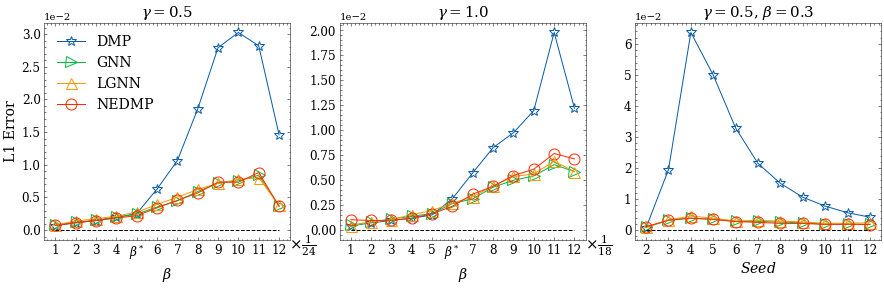

In [85]:
plt.figure(figsize=(15, 4))

data_names = ["beta{}".format(x) for x in range(1, 13)]

DMP = []
GNN = []
LGNN = []
NEDMP = []
S = []
diff = "SIR"
for i in range(12):
    dmp, gnn, s = readRes(data_names[i], diff=diff, model_name="gnn", metric="all")
    dmp, lgnn, s = readRes(data_names[i], diff=diff, model_name="lgnn", metric="all")
    dmp, nedmp, s = readRes(data_names[i], diff=diff, model_name="nedmp", metric="all")
#     print("DMP = {:.6f} GNN : {:.6f}".format(dmp[0], gnn[0]))
#     print("DMP = {:.6f} LGNN: {:.6f}".format(dmp[0], lgnn[0]))
    DMP.append(dmp)
    GNN.append(gnn)
    LGNN.append(lgnn)
    NEDMP.append(nedmp)
    S.append(s)

ax1 = plt.subplot(131)
ax1.plot(range(1, 13), [x[0] for x in DMP], lw=1, marker="*", label="DMP", markerfacecolor='none', markersize=11)
ax1.plot(range(1, 13), [x[0] for x in GNN], lw=1, marker=">", label="GNN", markerfacecolor='none', markersize=11)
ax1.plot(range(1, 13), [x[0] for x in LGNN], lw=1, marker="^", label="LGNN", markerfacecolor='none', markersize=11)
ax1.plot(range(1, 13), [x[0] for x in NEDMP], lw=1, marker="o", label="NEDMP", markerfacecolor='none', markersize=11)

ax1.plot(range(1, 13), [0]*12, "--k")

ticks = ["{}".format(x) for x in range(1, 13)]
ticks[4] = r"$\beta^*$"
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(ticks, fontsize=fs)

ax1.set_title(r"$\gamma=0.5$", fontsize=fs+3)

ax1.set_xlabel(r"$\beta $", fontsize=fs+2)
ax1.set_ylabel("L1 Error", fontsize=fs+2)
ax1.text(12.5, -0.003, r"$\times \frac{1}{24}$", fontsize=15)
ax1.legend(fontsize=fs+2)
ax1.yaxis.set_tick_params(labelsize=fs)

ax1.ticklabel_format(style='sci', scilimits=(1,2), axis='y')


DMP = []
GNN = []
LGNN = []
NEDMP = []
S = []
diff = "IC"
for i in range(12):
    dmp, gnn, s = readRes(data_names[i], diff=diff, model_name="gnn", metric="all")
    dmp, lgnn, s = readRes(data_names[i], diff=diff, model_name="lgnn", metric="all")
    dmp, nedmp, s = readRes(data_names[i], diff=diff, model_name="nedmp", metric="all")
    DMP.append(dmp)
    GNN.append(gnn)
    LGNN.append(lgnn)
    NEDMP.append(nedmp)
    S.append(s)

ax2 = plt.subplot(132)

ax2.plot(range(1, 13), [x[0] for x in DMP], lw=1, marker="*", label="DMP", markerfacecolor='none', markersize=11)
ax2.plot(range(1, 13), [x[0] for x in GNN], lw=1, marker=">", label="GNN", markerfacecolor='none', markersize=11)
ax2.plot(range(1, 13), [x[0] for x in LGNN], lw=1, marker="^", label="LGNN", markerfacecolor='none', markersize=11)
ax2.plot(range(1, 13), [x[0] for x in NEDMP], lw=1, marker="o", label="NEDMP", markerfacecolor='none', markersize=11)

ax2.plot(range(1, 13), [0]*12, "--k")

ticks = ["{}".format(x) for x in range(1, 13)]
ticks[5] = r"$\beta^*$"
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(ticks, fontsize=fs)

ax2.set_title(r"$\gamma=1.0$", fontsize=fs+3)

ax2.set_xlabel(r"$\beta $", fontsize=fs+2)
ax2.text(12.5, -0.002, r"$\times \frac{1}{18}$", fontsize=15)
ax2.yaxis.set_tick_params(labelsize=fs)

ax2.ticklabel_format(style='sci', scilimits=(1,2), axis='y')

## 3. structure
data_names = ["d{}".format(x) for x in range(2, 13)]
DMP = []
GNN = []
LGNN = []
NEDMP = []
S = []
for i in range(11):
    dmp, gnn, s = readRes2(data_names[i], model_name="gnn", metric="all")
    dmp, lgnn, s = readRes2(data_names[i], model_name="lgnn", metric="all")
    dmp, nedmp, s = readRes2(data_names[i], model_name="nedmp", metric="all")
    DMP.append(dmp)
    GNN.append(gnn)
    LGNN.append(lgnn)
    NEDMP.append(nedmp)
    S.append(s)
ax3 = plt.subplot(133)
ax3.plot(range(2, 13), [x[0] for x in DMP], lw=1, marker="*", label="DMP", markerfacecolor='none', markersize=11)
ax3.plot(range(2, 13), [x[0] for x in GNN], lw=1, marker=">", label="GNN", markerfacecolor='none', markersize=11)
ax3.plot(range(2, 13), [x[0] for x in LGNN], lw=1, marker="^", label="LGNN", markerfacecolor='none', markersize=11)
ax3.plot(range(2, 13), [x[0] for x in NEDMP], lw=1, marker="o", label="NEDMP", markerfacecolor='none', markersize=11)

ax3.plot(range(2, 13), [0]*11, "--k")

ticks = ["{}".format(x) for x in range(2, 13)]
ax3.set_xticks(range(2, 13))
ax3.set_xticklabels(ticks, fontsize=fs)

ax3.set_xlabel(r"$ Seed $", fontsize=fs+2)
ax3.set_title(r"$\gamma=0.5$, $\beta=0.3$", fontsize=fs+3)
ax3.yaxis.set_tick_params(labelsize=fs)
ax3.ticklabel_format(style='scientific', scilimits=(1,2), axis='y')

plt.savefig("performance_regular_parameters.pdf", bbox_inches='tight')
plt.show()